# Final Capstone Project:
## Predicting House Prices from Zillow Images 

## Data Wrangling/EDA Notebook 1: Accompanying CSV file

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the csv file that accompanied the images indo a dataframe:
file = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/austinHousingData.csv'
df = pd.read_csv(file)
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

Column # 46 'homeImage' is the name of the image file... this will be important as it is how the image files are named.

Column # 18 is 'latestPrice' and this will be the target feature. 

### Explore the Target Feature: Price

In [4]:
df['latestPrice'].describe().astype(int)

count       15171
mean       512767
std        453185
min          5500
25%        309000
50%        405000
75%        575000
max      13500000
Name: latestPrice, dtype: int64

Average price is ~ $500K
Most expensive home  $13.5M 
Cheapest listing is $5500

In [5]:
# exploring the cheapest listings:

df.sort_values(by=['latestPrice'],
axis=0, ascending=True, inplace=False).head(10).T

,844,5796,785,9310,13184,14335,9272,14580,4823,9869
zpid,29361735,70337317,83123966,29381466,29332104,29338824,29471989,29339192,29492341,64772328
city,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
streetAddress,3302 Blue Jay Ln,1812 Eagles Glen Cv,7109 Greenshores Dr,1907 Holly St,1500 Hartford Rd,3602 River Rd,1604 Eva St,2800 Westlake Dr,8801 Young Ln,4109 E 12th St #2
zipcode,78732,78732,78730,78702,78703,78703,78704,78746,78737,78721
description,"3302 Blue Jay Ln, Austin, TX 78732 is a single...",Ideally situated in the prestigious gated Univ...,"7109 Greenshores Dr, Austin, TX 78730 is a sin...",Be the first to move in this luxurious home! C...,"1500 Hartford Rd, Austin, TX 78703 is a single...",Beautiful mid century modern home with a conte...,Rare one-of-a-kind chic home in Bouldin! Priva...,"Fabulous, sunny and comfortable in peaceful We...",Coming soon! This exclusive home is not listed...,Charming condo in one of Austin's desirable Ea...
latitude,30.3837,30.355,30.3442,30.253,30.285,30.307,30.248,30.3095,30.213,30.2783
longitude,-97.9135,-97.8922,-97.8174,-97.7258,-97.7619,-97.7745,-97.7519,-97.7816,-97.9212,-97.6887
propertyTaxRate,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98
garageSpaces,4,3,0,2,0,2,2,2,3,1
hasAssociation,False,True,True,False,False,True,False,False,True,True


Due to being alarmed at a $5,500 listing, I cross checked some of these listings on Zillow. The home at 3302 Blue Jay Ln, Austin, TX 78732 has 5 bedrooms and sold in 2018 for around $2M.

I think there must be some errors in the data with these low values. The cheapest listings on Zillow are currently in the $100,000 range, with some empty lots as low as $70,000.  I would recommend removing the entries in the dataset that are less than $70,000. 

In [6]:
# get number of entries that are below 70,000 as these could be errors (based on the histogram)
len(df[df['latestPrice']<70000])


22

In [7]:
# exploring the most expensive listings:

df.sort_values(by=['latestPrice'],
axis=0, ascending=False, inplace=False).head(10).T

,2316,14275,1399,290,14639,1298,14376,14395,14627,1360
zpid,125904370,80097372,29341549,29344920,29342048,29344579,29343242,29343220,29342058,70337612
city,austin,austin,austin,austin,austin,austin,austin,austin,austin,austin
streetAddress,12400 Cedar St,5909 Lookout Mountain Dr,1101 N Weston Ln,2105 Island Wood Rd,3904 Waters Edge Dr,5401 Maryanna Dr,4902 Tortuga Pl,4406 Island Cv,3811 Westlake Dr,14300 Flat Top Ranch Rd
zipcode,78732,78731,78733,78733,78731,78746,78731,78731,78746,78732
description,12400 Cedar Street - Villa Del Lago is a uniqu...,"5909 Lookout Mountain Dr, Austin, TX 78731 is ...",This beautiful 10+ acre site has endless possi...,-,"3904 Waters Edge Dr, Austin, TX 78731 is a sin...",Gated private cul-de- sac estate on 5 acres w ...,Inspired by the 160 ft of Lake Austin waterfro...,This beautiful move-in ready estate in the pre...,Beautiful contemporary home sitting on 100' of...,Huge Price Improvement. Prized waterfront retr...
latitude,30.3929,30.3454,30.3234,30.3372,30.3221,30.3378,30.3326,30.3293,30.3259,30.3762
longitude,-97.8776,-97.7812,-97.8422,-97.8467,-97.7751,-97.7903,-97.7803,-97.7783,-97.7796,-97.913
propertyTaxRate,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98
garageSpaces,5,2,0,3,0,0,2,0,4,0
hasAssociation,False,True,True,True,True,True,False,True,False,True


After searching Zillow for their currently listings in Austin and sorting by highest to lowest, the most expensive listing is $12.9M.  These data in the dataset were scraped in January 2021, so I think that the listings in the range of $10-13.5M are ok. I would not recommend removing any entrees from the higher price end of the dataset. 

In [8]:
# Remove the 22 listings that are less that $70K

df = df[df['latestPrice']>=70000]

In [12]:
# check that they were removed
df['latestPrice'].describe().astype(int)

count       15149
mean       513467
std        453140
min         70000
25%        309000
50%        405000
75%        575000
max      13500000
Name: latestPrice, dtype: int64

In [ ]:
# the min is now 70,000 and the average is now $513,467.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15149 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15149 non-null  int64  
 1   city                        15149 non-null  object 
 2   streetAddress               15149 non-null  object 
 3   zipcode                     15149 non-null  int64  
 4   description                 15149 non-null  object 
 5   latitude                    15149 non-null  float64
 6   longitude                   15149 non-null  float64
 7   propertyTaxRate             15149 non-null  float64
 8   garageSpaces                15149 non-null  int64  
 9   hasAssociation              15149 non-null  bool   
 10  hasCooling                  15149 non-null  bool   
 11  hasGarage                   15149 non-null  bool   
 12  hasHeating                  15149 non-null  bool   
 13  hasSpa                      151

In [ ]:
# there are now 15149 entries

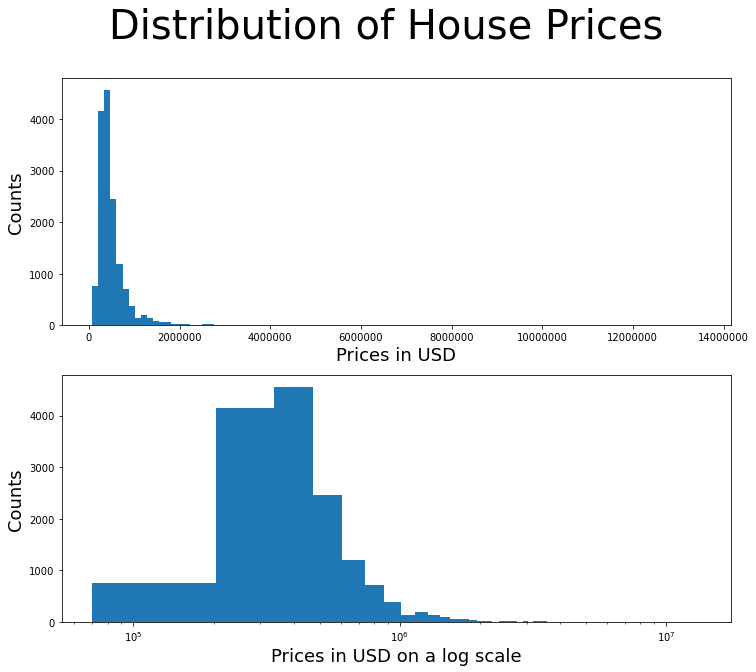

In [15]:
# Plotting the distribution of the prices
fig, (ax1,ax2) = plt.subplots(2,1)
plt.rcParams["figure.figsize"] = (12,10)
fig.suptitle('Distribution of House Prices', fontsize=40)


ax1.hist(df['latestPrice'], bins=100)
#ax1.ticklabel_format(style='sci')
#ax.set_xscale('log')

#ax1.set_title('')
ax1.set_ylabel('Counts',fontsize=18)
ax1.set_xlabel('Prices in USD', fontsize=18)
ax1.ticklabel_format(style='plain')

ax2.hist(df['latestPrice'], bins=100)

ax2.set_xscale('log')
#ax2.ticklabel_format(style='plain')
#ax2.set_title('Distribution of House Prices')
ax2.set_ylabel('Counts',fontsize=18)
ax2.set_xlabel('Prices in USD on a log scale', fontsize=18)

plt.show()

The majority of homes are below 1 million USD. 

In [16]:
print(df['latestPrice'].value_counts())

print('There are ' + str(len(df['latestPrice'].value_counts())) + ' unique values for price.')

325000.0    202
450000.0    189
375000.0    182
350000.0    179
425000.0    177
           ... 
776000.0      1
218500.0      1
309285.0      1
179750.0      1
454700.0      1
Name: latestPrice, Length: 2345, dtype: int64
There are 2345 unique values for price.


### Explore the other features

In [17]:
df['city'].unique()
df['city'].value_counts()

austin              14998
del valle              86
pflugerville           36
driftwood              12
manor                   6
dripping springs        5
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

In [18]:
df['homeType'].value_counts()

Single Family            14224
Condo                      468
Townhouse                  173
Multiple Occupancy          96
Vacant Land                 81
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [ ]:
 # take away: some of the homes are not listed as in Austin, but most are.
 # most homes are single-family, condo, or townhouse. 

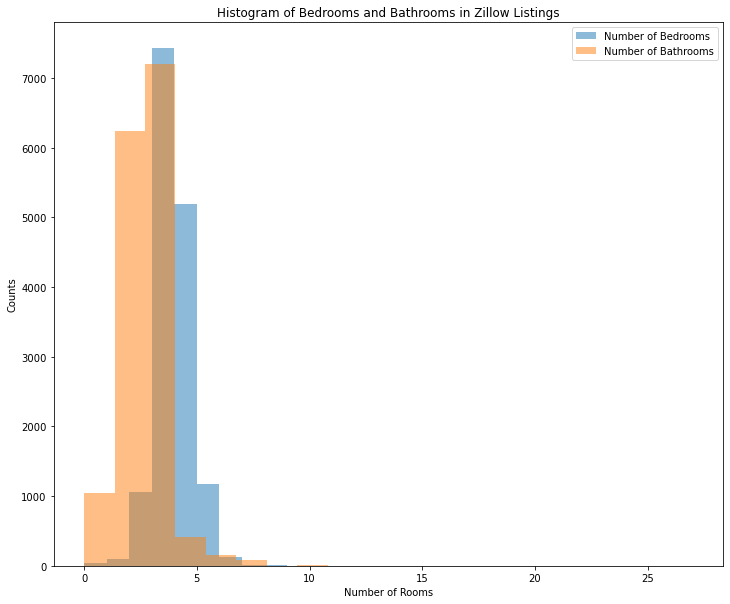

In [20]:
# Plotting the number of bedrooms and bathrooms represented in the data

plt.hist(df['numOfBedrooms'], bins = 20, alpha=0.5)
plt.hist(df['numOfBathrooms'], bins=20, alpha=0.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Counts')
plt.title('Histogram of Bedrooms and Bathrooms in Zillow Listings')
plt.legend(['Number of Bedrooms', 'Number of Bathrooms'])
plt.show()

In [ ]:
# take away: most of the homes have normally distributed data for number of bedrooms and bathrooms. 
# 3 and 4 bedrooms is most common.
# 2 and 3 bathrooms is most common.

### Feature Correlations

<AxesSubplot:>

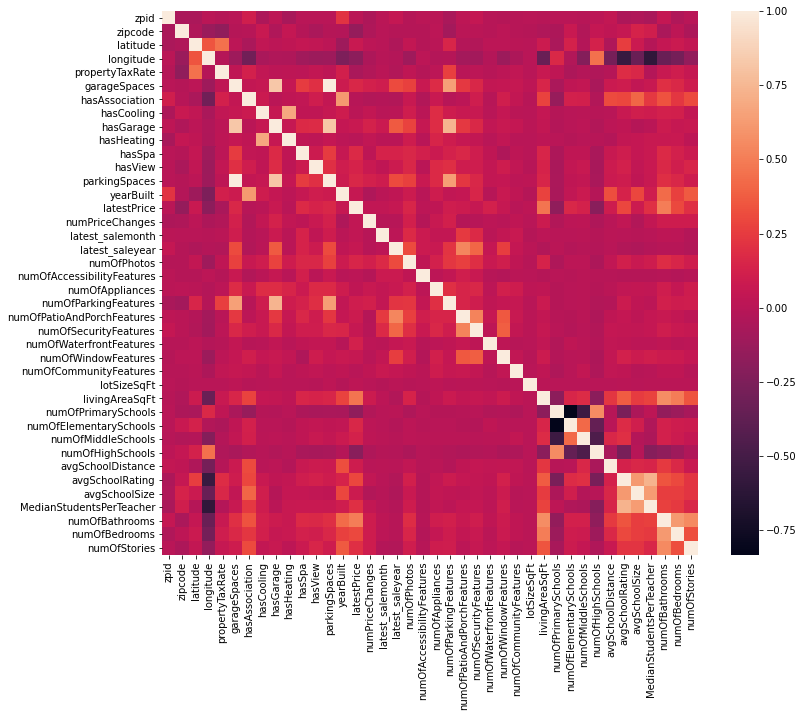

In [21]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
# Postive correlation with price: livingAreaSqFt, avgSchoolRating, numofBathrooms

# Negative correlation with price: numOfHighSchools, numOfPrimarySchools

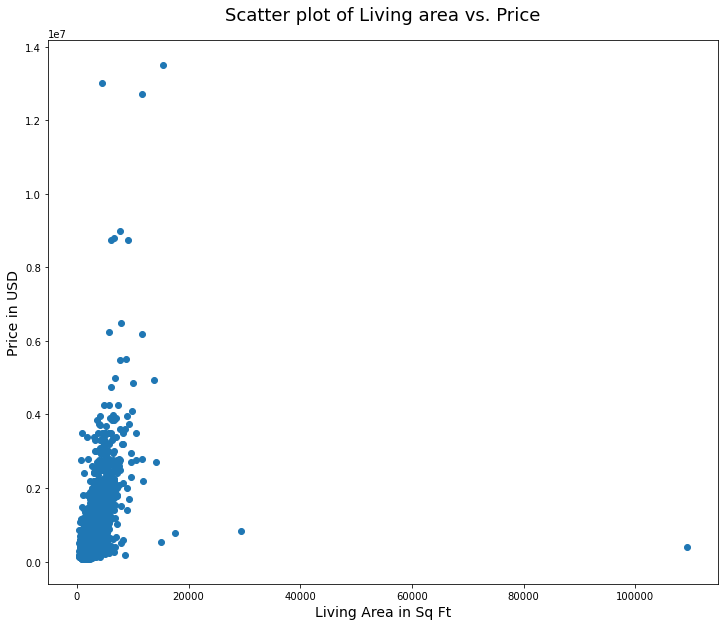

In [22]:
plt.scatter(df['livingAreaSqFt'],df['latestPrice'])
plt.xlabel('Living Area in Sq Ft', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.title('Scatter plot of Living area vs. Price', fontsize=18, pad=20)
plt.show()

Since we are mainly focuses about analyzing the images, we won't spend too much time exploring the various features at this point.

In [52]:
# Creating a new dataframe with the only the two columns we need for the image analysis:


new_df = df[['homeImage','latestPrice']]
new_df.head()

,homeImage,latestPrice
0,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,305000.0
1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,295000.0
2,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,256125.0
3,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,240000.0
4,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,239900.0


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15149 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   homeImage    15149 non-null  object 
 1   latestPrice  15149 non-null  float64
dtypes: float64(1), object(1)
memory usage: 995.1+ KB


In [54]:
# Renaming the columns 
new_df.rename(columns= 
              {'homeImage':'Image Name','latestPrice':'Price'}, inplace=True)

/Users/sangeetajayakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15149 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image Name  15149 non-null  object 
 1   Price       15149 non-null  float64
dtypes: float64(1), object(1)
memory usage: 995.1+ KB


#### The final cleaned dataframe can be exported to a new csv file. 
commented out to not create multiple files

In [56]:
# output this new csv file 
#path_to_folder = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles'
#new_file_name = 'cleaned_AH_data.csv'


#new_df.to_csv(r'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/cleaned_AH_data_v2.csv', index=False)

